In [1]:
%%time

import fastai
from fastai.vision.all import *
from pathlib import Path

CPU times: user 1.47 s, sys: 1.1 s, total: 2.57 s
Wall time: 1.83 s


In [2]:
%%time
! pip install -q kaggle

You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.
CPU times: user 63.7 ms, sys: 53.3 ms, total: 117 ms
Wall time: 2.39 s


In [3]:
%%time

! mkdir ~/.kaggle

CPU times: user 10.5 ms, sys: 35.2 ms, total: 45.7 ms
Wall time: 344 ms


In [4]:
%%time
! cp kaggle.json ~/.kaggle/

CPU times: user 1.17 ms, sys: 44.4 ms, total: 45.6 ms
Wall time: 365 ms


In [5]:
%%time
! chmod 600 ~/.kaggle/kaggle.json

CPU times: user 6.74 ms, sys: 31.1 ms, total: 37.8 ms
Wall time: 352 ms


In [6]:
%%time
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-30 14:37:36          16688       1314  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10070        725  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4689        328  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [7]:
%%time
! kaggle datasets download -d xainano/handwrittenmathsymbols

 99%|███████████████████████████████████████▍| 338M/343M [00:06<00:00, 61.1MB/s]
100%|████████████████████████████████████████| 343M/343M [00:06<00:00, 58.7MB/s]
CPU times: user 279 ms, sys: 86.2 ms, total: 365 ms
Wall time: 7.92 s


In [31]:
%%time
! unzip handwrittenmathsymbols.zip

Archive:  handwrittenmathsymbols.zip
  inflating: data.rar                
  inflating: extracted_images/!/!_100071.jpg  
  inflating: extracted_images/!/!_100077.jpg  
  inflating: extracted_images/!/!_100082.jpg  
  inflating: extracted_images/!/!_100085.jpg  
  inflating: extracted_images/!/!_100088.jpg  
  inflating: extracted_images/!/!_100259.jpg  
  inflating: extracted_images/!/!_100620.jpg  
  inflating: extracted_images/!/!_100626.jpg  
  inflating: extracted_images/!/!_100631.jpg  
  inflating: extracted_images/!/!_100634.jpg  
  inflating: extracted_images/!/!_100637.jpg  
  inflating: extracted_images/!/!_101186.jpg  
  inflating: extracted_images/!/!_102100.jpg  
  inflating: extracted_images/!/!_102106.jpg  
  inflating: extracted_images/!/!_102111.jpg  
  inflating: extracted_images/!/!_102114.jpg  
  inflating: extracted_images/!/!_102117.jpg  
  inflating: extracted_images/!/!_102328.jpg  
  inflating: extracted_images/!/!_10244.jpg  
  inflating: extracted_images/!/!

In [9]:
%%time
path = Path.cwd()/"extracted_images/"

CPU times: user 212 µs, sys: 145 µs, total: 357 µs
Wall time: 287 µs


In [11]:
%%time
path.ls()

CPU times: user 2.17 ms, sys: 1.48 ms, total: 3.65 ms
Wall time: 2.2 ms


(#7) [Path('/home/extracted_images/!'),Path('/home/extracted_images/('),Path('/home/extracted_images/)'),Path('/home/extracted_images/+'),Path('/home/extracted_images/,'),Path('/home/extracted_images/-'),Path('/home/extracted_images/0')]

In [2]:
%%time
dblocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                     splitter = RandomSplitter(valid_pct = 0.3, seed = 251),
                     get_items = get_image_files,
                     get_y = parent_label,
                     item_tfms = Resize(440),
                     batch_tfms = aug_transforms(size = 224, min_scale = 0.75))

CPU times: user 5.79 ms, sys: 0 ns, total: 5.79 ms
Wall time: 5.57 ms


In [14]:
%%time

dls = dblocks.dataloaders(path, device = "cuda")

CPU times: user 9.72 s, sys: 2.74 s, total: 12.5 s
Wall time: 15.4 s


/opt/conda/lib/python3.8/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


CPU times: user 1.3 s, sys: 138 ms, total: 1.44 s
Wall time: 763 ms


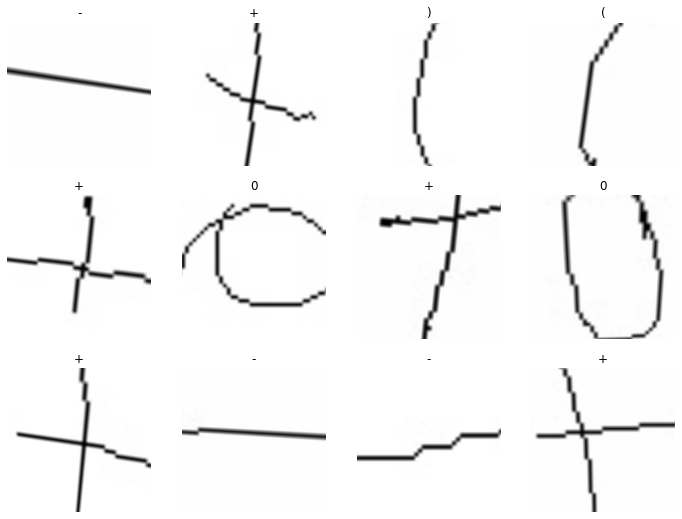

In [15]:
%%time
dls.show_batch(max_n = 12)

In [16]:
%%time
learn = cnn_learner(dls, resnet34, loss_func = CrossEntropyLossFlat(), metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/.cache/torch/hub/checkpoints/resnet34-b627a593.pth



CPU times: user 1.54 s, sys: 623 ms, total: 2.16 s
Wall time: 13.5 s


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


CPU times: user 15.1 s, sys: 3.02 s, total: 18.2 s
Wall time: 19.9 s


/opt/conda/lib/python3.8/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0020892962347716093)

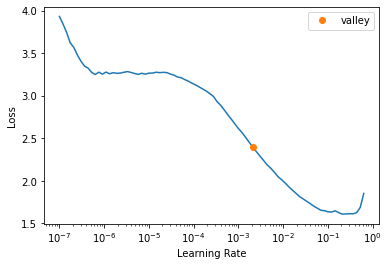

In [17]:
%%time
learn.lr_find()

In [22]:
%%time
learn.fit_one_cycle(10, 3e-2)

CPU times: user 33min 34s, sys: 5min 9s, total: 38min 44s
Wall time: 39min 21s


In [3]:
%%time
def get_dls(size, bs):
    dblocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                        splitter = RandomSplitter(valid_pct = 0.3, seed = 251),
                        get_items = get_image_files,
                        get_y = parent_label,
                        item_tfms = Resize(440),
                        batch_tfms = aug_transforms(size = size, min_scale = 0.75))
    
    return dblocks.dataloaders(path, bs = bs, device = "cuda")

CPU times: user 6 µs, sys: 4 µs, total: 10 µs
Wall time: 17.2 µs


CPU times: user 181 ms, sys: 4.72 ms, total: 186 ms
Wall time: 180 ms


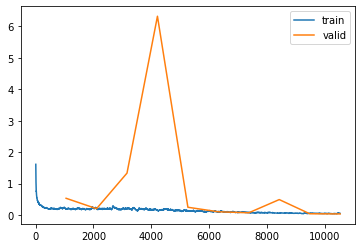

In [27]:
%%time
learn.recorder.plot_loss()

In [28]:
%%time
preds, targs = learn.get_preds()

CPU times: user 32.6 s, sys: 5.08 s, total: 37.6 s
Wall time: 39.4 s


In [29]:
accuracy(preds, targs)

TensorBase(0.9888)

In [32]:
## taking a small subset of data

In [4]:
path = Path.cwd()/"subset_extracted_images/"

In [5]:
%%time
path.ls()

CPU times: user 2.39 ms, sys: 0 ns, total: 2.39 ms
Wall time: 1.56 ms


(#8) [Path('/home/subset_extracted_images/.ipynb_checkpoints'),Path('/home/subset_extracted_images/-'),Path('/home/subset_extracted_images/,'),Path('/home/subset_extracted_images/!'),Path('/home/subset_extracted_images/('),Path('/home/subset_extracted_images/)'),Path('/home/subset_extracted_images/+'),Path('/home/subset_extracted_images/0')]

In [6]:
%%time
dls = get_dls(128,128)

CPU times: user 2.87 s, sys: 1.47 s, total: 4.34 s
Wall time: 4.26 s


/opt/conda/lib/python3.8/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


CPU times: user 1.06 s, sys: 62.2 ms, total: 1.12 s
Wall time: 744 ms


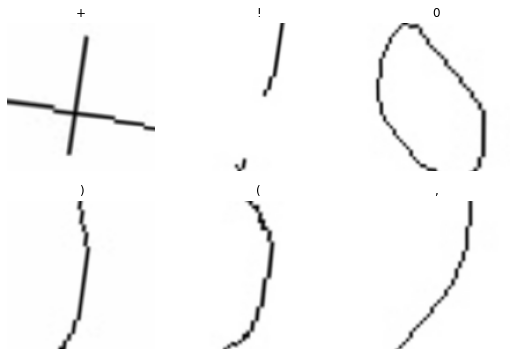

In [7]:
%%time
dls.show_batch(max_n = 6)

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


CPU times: user 13.9 s, sys: 6.18 s, total: 20 s
Wall time: 27.5 s


/opt/conda/lib/python3.8/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0008317637839354575)

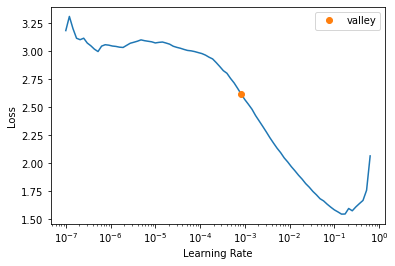

In [8]:
%%time
learn = cnn_learner(dls, resnet34, loss_func = CrossEntropyLossFlat(), metrics = error_rate)
learn.lr_find()

In [9]:
%%time
learn.fit_one_cycle(5, 1e-2)

CPU times: user 16.7 s, sys: 11.1 s, total: 27.8 s
Wall time: 41.5 s


In [10]:
%%time
learn.dls = get_dls(224, 64)

CPU times: user 286 ms, sys: 5.01 ms, total: 291 ms
Wall time: 243 ms


In [11]:
%%time
learn.fine_tune(5, 1e-2)

CPU times: user 40.9 s, sys: 27.1 s, total: 1min 8s
Wall time: 1min 19s


CPU times: user 34.2 ms, sys: 14.9 ms, total: 49.1 ms
Wall time: 42 ms


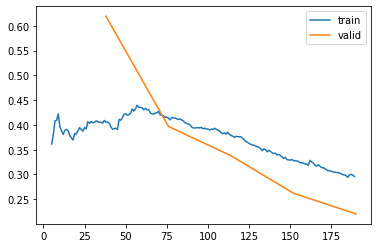

In [12]:
%%time
learn.recorder.plot_loss()

In [13]:
%%time
preds, targs = learn.get_preds()

CPU times: user 1.24 s, sys: 973 ms, total: 2.21 s
Wall time: 3.17 s


In [14]:
%%time
accuracy(preds, targs)

CPU times: user 3.46 ms, sys: 2.08 ms, total: 5.53 ms
Wall time: 2.97 ms


TensorBase(0.9162)

In [15]:
%%time 
preds, targs = learn.tta()

CPU times: user 6.97 s, sys: 4.81 s, total: 11.8 s
Wall time: 16.3 s


In [16]:
accuracy(preds, targs)

TensorBase(0.9152)

In [17]:
## trying out mixup

In [35]:
torch.cuda.empty_cache()

In [49]:
%%time
dls = get_dls(128,128)

CPU times: user 406 ms, sys: 33.8 ms, total: 440 ms
Wall time: 347 ms


In [50]:
%%time

model = xresnet34()

learn = Learner(dls,model, loss_func = CrossEntropyLossFlat(), metrics = accuracy, cbs = MixUp())

#learn.lr_find()

CPU times: user 369 ms, sys: 21.1 ms, total: 390 ms
Wall time: 387 ms


In [52]:
%%time
x,y= dls.one_batch()

CPU times: user 892 ms, sys: 83.3 ms, total: 975 ms
Wall time: 595 ms


In [53]:
%%time
print (x.shape, y.shape)

torch.Size([128, 3, 128, 128]) torch.Size([128])
CPU times: user 430 µs, sys: 281 µs, total: 711 µs
Wall time: 496 µs


In [30]:
%%time
dls.vocab

CPU times: user 247 µs, sys: 159 µs, total: 406 µs
Wall time: 416 µs


['!', '(', ')', '+', ',', '-', '0']

In [32]:
y

TensorCategory([4, 0, 0, 0, 1, 2, 1, 3, 5, 5, 6, 0, 6, 1, 6, 4, 1, 2, 5, 2, 6, 0, 3, 5,
        4, 3, 4, 3, 3, 6, 0, 0, 5, 1, 4, 2, 4, 1, 2, 4, 5, 4, 0, 6, 1, 6, 5, 0,
        3, 4, 1, 4, 1, 4, 3, 4, 4, 4, 5, 1, 2, 0, 1, 5, 4, 2, 5, 0, 2, 6, 6, 2,
        1, 0, 3, 5, 0, 5, 2, 1, 5, 1, 4, 1, 0, 5, 0, 5, 4, 5, 0, 1, 5, 4, 4, 4,
        2, 2, 6, 0, 0, 6, 4, 0, 5, 4, 5, 3, 4, 4, 2, 2, 3, 3, 5, 6, 1, 4, 5, 6,
        3, 4, 5, 4, 5, 1, 3, 4], device='cuda:0')

In [54]:
%%time

learn.fit_one_cycle(n_epoch = 7, lr_max = 1e-2)

CPU times: user 23.6 s, sys: 19.6 s, total: 43.2 s
Wall time: 1min 2s


In [55]:
%%time

learn.dls = get_dls(224, 64)

CPU times: user 326 ms, sys: 21.8 ms, total: 348 ms
Wall time: 257 ms


In [56]:
%%time
learn.fine_tune(5, 3e-2)

CPU times: user 41.8 s, sys: 29.2 s, total: 1min 11s
Wall time: 1min 22s


In [57]:
%%time
learn.fine_tune(5, 3e-2)

CPU times: user 42 s, sys: 29.2 s, total: 1min 11s
Wall time: 1min 21s


In [58]:
### trying out label smoothing

CPU times: user 15.5 s, sys: 10.5 s, total: 26 s
Wall time: 28.7 s


SuggestedLRs(valley=0.0014454397605732083)

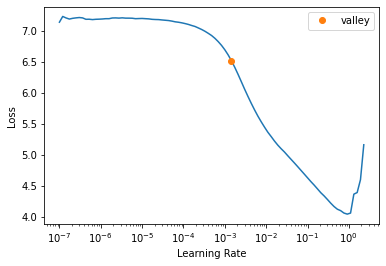

In [59]:
%%time
dls = get_dls(224, 64)
model = xresnet34()
learn = Learner(dls, model, loss_func = LabelSmoothingCrossEntropy(), metrics = accuracy)

learn.lr_find()

In [61]:
learn.fit_one_cycle(7, 5e-1)

In [62]:
%%time
preds, targ = learn.tta()

CPU times: user 7.61 s, sys: 5.39 s, total: 13 s
Wall time: 16.7 s


In [63]:
%%time
accuracy(preds, targ)

CPU times: user 88.7 ms, sys: 0 ns, total: 88.7 ms
Wall time: 16.5 ms


TensorBase(0.8362)